<H1>Agrupamiento, agrupamiento espacial y geodemografía (geodemographics)</H1>



In [2]:
'''
!pip install geopandas
!pip install sklearn
!pip install libpysal
!pip install pysal==2.0.0
!pip install mapclassify==2.2.0
'''

'\n!pip install geopandas\n!pip install sklearn\n!pip install libpysal\n!pip install pysal==2.0.0\n!pip install mapclassify==2.2.0\n'

In [3]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from libpysal import weights as ct
import pysal.lib.weights.set_operations as Wsets

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>Datos</h2>
 

In [5]:
#Carga los datos
abb = gpd.read_file('oax_pob.geojson')

In [6]:
# Fija el CRS manualmente. 
abb.crs = {'init': u'epsg:4326'}
abb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cvegeo      570 non-null    object  
 1   nom_mun     570 non-null    object  
 2   sup_aglad   570 non-null    float64 
 3   poblacion   570 non-null    float64 
 4   pobreza     570 non-null    float64 
 5   pobreza_po  570 non-null    float64 
 6   pobreza_e   570 non-null    float64 
 7   pobreza_e_  570 non-null    float64 
 8   pobreza_m   570 non-null    float64 
 9   pobreza_m_  570 non-null    float64 
 10  vul_car     570 non-null    float64 
 11  vul_car_po  570 non-null    float64 
 12  vul_ing     570 non-null    float64 
 13  vul_ing_po  570 non-null    float64 
 14  npnv        570 non-null    float64 
 15  npnv_pob    570 non-null    float64 
 16  ic_rezedu   570 non-null    float64 
 17  ic_rezedu_  570 non-null    float64 
 18  ic_asalud   570 non-null    float64 
 19  

Índices de rezago - Unidad: población

In [7]:
ratings = ['ic_rezedu_', 'ic_asalud_', 'ic_segsoc_', 'ic_cv_pob', 'ic_sbv_pob', 'ic_ali_pob']

<h2>Exploración de variables</h2>


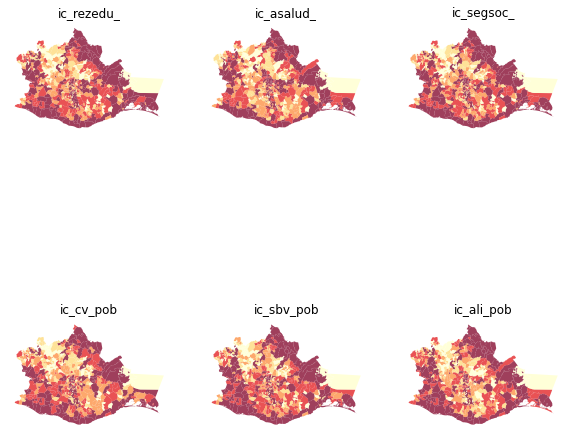

In [8]:
# Crea figura y ejes (en este caso es un arreglo de 3 x 3)
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
# Hace los ejes accesibles con una sola indexación
axs = axs.flatten()
# Comienza el loop sobre las variables de interés
for i, col in enumerate(ratings):
    # Selecciona el eje en el que el irá el mapa.
    ax = axs[i]
    # Grafica el mapa
    abb.plot(column=col, ax=ax, scheme='Quantiles', \
             linewidth=0, cmap='YlOrRd', alpha=0.75)
    # Remueve "basura" del eje
    ax.set_axis_off()
    # Le pone el nombre de la variable a cada eje
    ax.set_title(col)
# Despliega la figura
plt.show()

<h3>Correlación entre variables</h3>

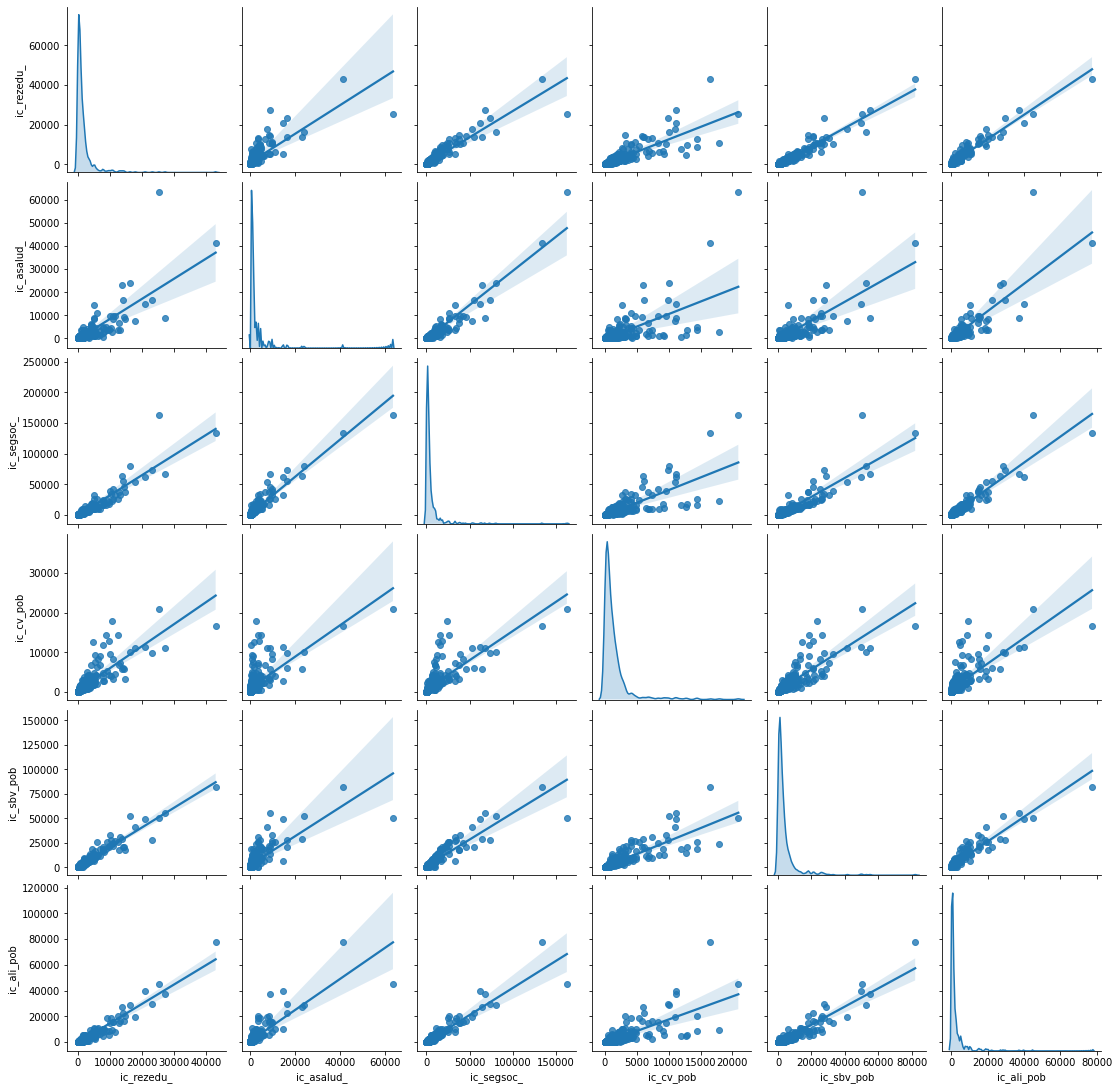

In [9]:
_ = sns.pairplot(abb[ratings], kind='reg', diag_kind='kde')

<h2>Clasificación demográfica con Kmeans</h2>


In [10]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [11]:
kmeans5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<p>Método de ajuste</p>

In [12]:
# Inicializar semilla
np.random.seed(1234)
# Kmeans
k5cls = kmeans5.fit(abb[ratings])

In [13]:
k5cls.labels_

array([0, 0, 0, 3, 0, 0, 3, 4, 3, 0, 0, 1, 0, 0, 0, 3, 4, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 1, 4, 3, 0, 3, 0, 4, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 0, 4, 4, 0,
       3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4,

<p>Cada número representa una categoría diferente, por lo que dos observaciones con el mismo número pertenecen al mismo grupo. Las etiquetas se devuelven en el mismo orden en que se pasaron los atributos de entrada, lo que significa que podemos agregarlas a la tabla de datos original como una columna adicional:</p>

In [14]:
abb['k5cls'] = k5cls.labels_

<h2>Mapeo de categorias</h2>

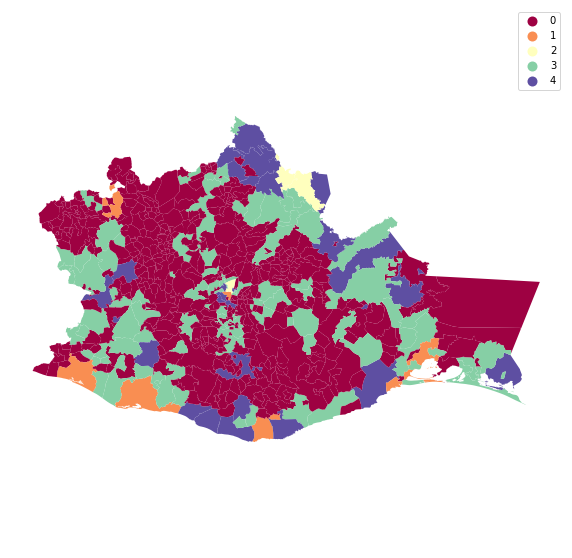

In [15]:
# Ajusta figura y ax
f, ax = plt.subplots(1, figsize=(10, 10))

# Graficar valores únicos coropletas incluyendo una leyenda y sin líneas de límite
abb.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax, cmap= 'Spectral')
# Remueve ejes
ax.set_axis_off()
# Mentiene los ejes proporcionados
plt.axis('equal')
# Despliega el mapa
plt.show()

<h2>Explorando la naturaleza de las categorías.</h2>

In [16]:
k5sizes = abb.groupby('k5cls').size()
k5sizes

k5cls
0    444
1      7
2      2
3     92
4     25
dtype: int64

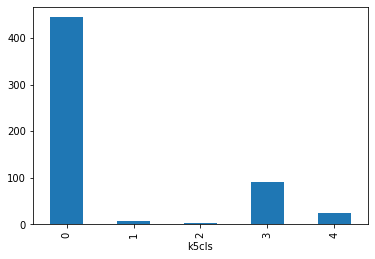

In [17]:
_ = k5sizes.plot.bar()

In [18]:
k5means = abb.groupby('k5cls')[ratings].mean()
# Muestra la tabla transpuesta
k5means.T

k5cls,0,1,2,3,4
ic_rezedu_,792.063063,19059.142857,34114.0,3298.467391,9504.88
ic_asalud_,337.849099,15900.571429,52434.5,1866.467391,5882.48
ic_segsoc_,1863.096847,65021.285714,148287.5,9095.043478,27143.88
ic_cv_pob,703.943694,9335.571429,18731.5,2684.717391,6769.00
ic_sbv_pob,1705.069820,39475.000000,66218.5,7440.793478,21168.20
ic_ali_pob,679.083333,29076.000000,61061.5,3996.576087,12032.28


In [19]:
# Calcular el summary 
k5desc = abb.groupby('k5cls')[ratings].describe()
# Muestra la tabla
k5desc

ic_rezedu_                              ... ic_ali_pob                   
           count          mean           std  ...        50%       75%      max
k5cls                                         ...                              
0          444.0    792.063063    612.287341  ...      475.0    941.25   3167.0
1            7.0  19059.142857   5007.539097  ...    28430.0  33392.50  39794.0
2            2.0  34114.000000  12428.108786  ...    61061.5  69229.75  77398.0
3           92.0   3298.467391   1293.363937  ...     3736.0   5220.25  10590.0
4           25.0   9504.880000   2829.568994  ...    10495.0  15495.00  20053.0

[5 rows x 48 columns]

In [20]:
#Otra forma de representar los resultados de la tabla anterior
for clus in k5desc.T:
    print('\n\t---------\n\tCluster %i'%clus)
    print(k5desc.T[clus].unstack())


	---------
	Cluster 0
            count         mean          std  ...     50%      75%     max
ic_rezedu_  444.0   792.063063   612.287341  ...   647.0  1132.25  2851.0
ic_asalud_  444.0   337.849099   327.674303  ...   241.0   438.00  2017.0
ic_segsoc_  444.0  1863.096847  1360.277464  ...  1540.5  2769.00  6402.0
ic_cv_pob   444.0   703.943694   611.360828  ...   525.0  1094.00  2941.0
ic_sbv_pob  444.0  1705.069820  1282.711289  ...  1357.5  2593.00  5867.0
ic_ali_pob  444.0   679.083333   627.581818  ...   475.0   941.25  3167.0

[6 rows x 8 columns]

	---------
	Cluster 1
            count          mean           std  ...      50%      75%      max
ic_rezedu_    7.0  19059.142857   5007.539097  ...  17952.0  22144.5  27173.0
ic_asalud_    7.0  15900.571429   6379.805166  ...  16520.0  19835.0  24157.0
ic_segsoc_    7.0  65021.285714   9645.397931  ...  63923.0  70287.5  80222.0
ic_cv_pob     7.0   9335.571429   2340.309941  ...  10066.0  11074.0  11214.0
ic_sbv_pob    7.0  39475

<p>Visualizar la distribución de valores por categoría</p>

In [21]:
# Nombrar (index) los renglones por la categoría a la que pertenecen 
to_plot = abb.set_index('k5cls')
# Subconjutno que solo mantiene las variables utilizadas por el K-Means
to_plot = to_plot[ratings]
# Muestra la tabla
to_plot.head()

,ic_rezedu_,ic_asalud_,ic_segsoc_,ic_cv_pob,ic_sbv_pob,ic_ali_pob
k5cls,,,,,,
0,216.0,133.0,478.0,109.0,380.0,203.0
0,186.0,73.0,295.0,93.0,333.0,80.0
0,1801.0,293.0,4430.0,1895.0,3543.0,1746.0
3,1874.0,1053.0,7346.0,1967.0,3320.0,1871.0
0,515.0,266.0,1314.0,357.0,812.0,423.0



<p>Apilando los datos</p>

In [22]:
to_plot = to_plot.stack()
to_plot.head()

k5cls            
0      ic_rezedu_    216.0
       ic_asalud_    133.0
       ic_segsoc_    478.0
       ic_cv_pob     109.0
       ic_sbv_pob    380.0
dtype: float64

<p>Esto devuelve un objeto de indexación múltiple, que podemos convertirlo en un DataFrame al tratar el índice como columnas adicionales:</p>

In [23]:
to_plot = to_plot.reset_index()
to_plot.head()

,k5cls,level_1,0
0,0,ic_rezedu_,216.0
1,0,ic_asalud_,133.0
2,0,ic_segsoc_,478.0
3,0,ic_cv_pob,109.0
4,0,ic_sbv_pob,380.0


Le damos a las columnas nombres más significativos:

In [24]:
to_plot = to_plot.rename(columns={'level_1': 'Rating', 0: 'Values'})
to_plot.head()

,k5cls,Rating,Values
0,0,ic_rezedu_,216.0
1,0,ic_asalud_,133.0
2,0,ic_segsoc_,478.0
3,0,ic_cv_pob,109.0
4,0,ic_sbv_pob,380.0


Visualizar la distribución de valores por categoría

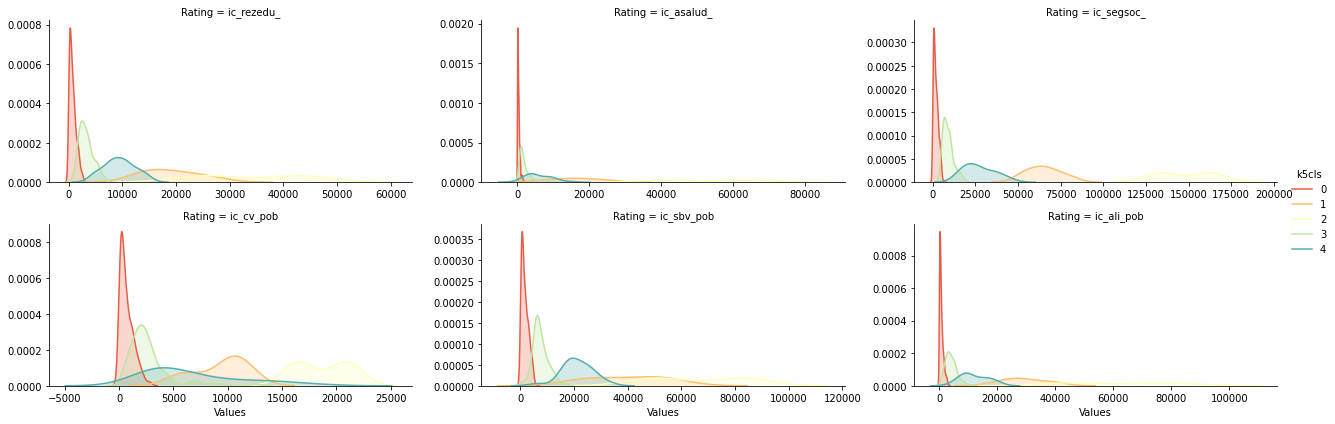

In [25]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, col='Rating', hue='k5cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3, palette = 'Spectral')

# Build the plot from sns.kdeplot
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()